# Handwritten digits predictions by building Neural Networks

In [2]:
# Made by Udayan Sharma 09/06/2024
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras

KeyboardInterrupt: 

In [45]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [46]:
len(X_train)

60000

In [47]:
len(X_test)

10000

In [48]:
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

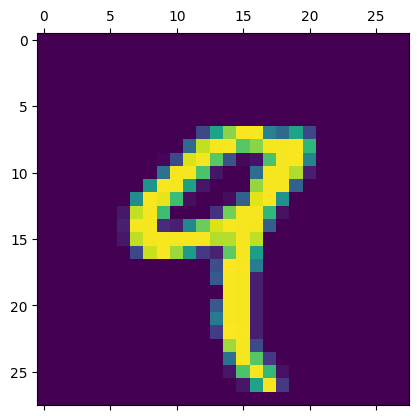

In [49]:
plt.matshow(X_train[4])

In [50]:
Y_train[:4]

array([5, 0, 4, 1], dtype=uint8)

In [51]:
X_train.shape

(60000, 28, 28)

In [69]:
X_train = X_train / 255
X_test = X_test / 255

In [70]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [71]:
X_train_flatten.shape

(60000, 784)

In [72]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    )
model.fit(X_train_flatten,Y_train,epochs=5)

c:\Users\udaya_z6clw8x\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8108 - loss: 0.7225
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9142 - loss: 0.3085
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9200 - loss: 0.2909
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9236 - loss: 0.2764
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9269 - loss: 0.2610


In [73]:
model.evaluate(X_test_flatten, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.9162 - loss: 0.3021


[0.26633796095848083, 0.9262999892234802]

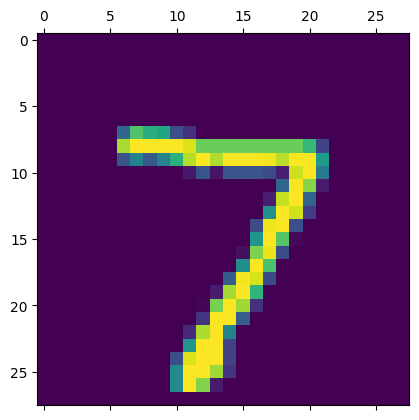

In [74]:
plt.matshow(X_test[0])

In [75]:
y_pred = model.predict(X_test_flatten)
y_pred[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step


array([3.1481415e-02, 3.5698309e-07, 4.2413402e-02, 9.5788479e-01,
       1.9420140e-03, 1.2202961e-01, 2.1816306e-06, 9.9983764e-01,
       1.0441542e-01, 7.6382905e-01], dtype=float32)

In [77]:
np.argmax(y_pred[0])

7

In [78]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]


[7, 2, 1, 0, 4]

In [79]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [83]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    5,    6,    3,    1,    0],
       [   0, 1107,    4,    2,    0,    1,    4,    2,   15,    0],
       [   7,    6,  929,   16,    9,    4,   12,   11,   34,    4],
       [   5,    0,   22,  912,    0,   29,    2,   12,   18,   10],
       [   2,    1,    3,    2,  912,    0,    9,    4,    9,   40],
       [  11,    2,    4,   25,   10,  779,   17,    5,   31,    8],
       [  14,    3,    8,    1,    7,    9,  913,    2,    1,    0],
       [   1,    5,   22,    4,    5,    0,    0,  952,    2,   37],
       [  10,    5,    7,   18,    9,   23,   11,   13,  870,    8],
       [  11,    6,    1,    7,   23,    7,    0,   23,    5,  926]])>

Text(95.72222222222221, 0.5, 'Truth')

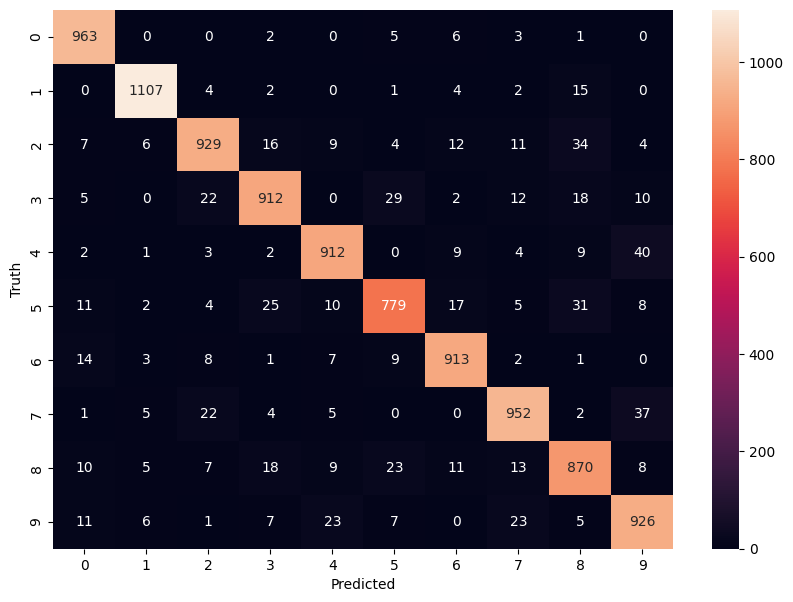

In [84]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using Hidden Layer

In [86]:
model = keras.Sequential([

    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    )
model.fit(X_train_flatten,Y_train,epochs=5)

c:\Users\udaya_z6clw8x\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8712 - loss: 0.4551
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9617 - loss: 0.1322
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9760 - loss: 0.0854
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9799 - loss: 0.0658
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9848 - loss: 0.0493


In [89]:
model.evaluate(X_test_flatten,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9723 - loss: 0.0907


[0.07758794724941254, 0.9753999710083008]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

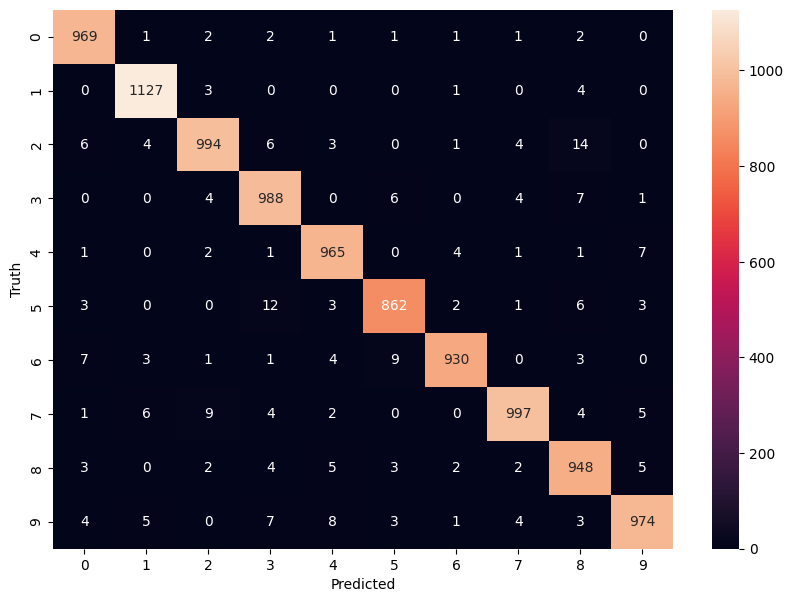

In [90]:
y_pred = model.predict(X_test_flatten)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels = Y_test, predictions=y_pred_labels)


plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Without flattening datasets

In [92]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #flatten your X_train and test without using it above
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],

    )
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8707 - loss: 0.4626
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9604 - loss: 0.1371
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9744 - loss: 0.0877
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9810 - loss: 0.0655
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9858 - loss: 0.0481
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9880 - loss: 0.0394
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9896 - loss: 0.0324
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9920 - loss: 0.0267
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9940 - loss: 0.0214
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9947 - loss: 0.0180
